**Классификатор товаров**

Для агрегатора магазинов одежды нужно сделать классификатор одежды на 10 классов

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AvgPool2D, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd

In [ ]:
df_train = pd.read_csv("/kaggle/input/fashion-mnist-df/fashion-mnist_train.csv")

features_train = np.array(df_train.drop(columns=['label'], axis=1))
target_train = np.array(df_train['label'])
print('features_train.head:', features_train.shape)
print()
print('target_train.head', target_train.shape)

features_train.head: (60000, 784)

target_train.head (60000,)


In [ ]:
df_test = pd.read_csv("/kaggle/input/fashion-mnist-df/fashion-mnist_test.csv")

features_test = np.array(df_test.drop(columns=['label'], axis=1))
target_test = np.array(df_test['label'])
print('features_test.head:', features_test.shape)
print()
print('target_test.head', target_test.shape)

features_test.head: (10000, 784)

target_test.head (10000,)


In [ ]:
def load_train():
    features = features_train.reshape(-1, 28, 28, 1) / 255
    return features, target_train

In [ ]:
def load_test():
    features = features_test.reshape(-1, 28, 28, 1) / 255
    return features, target_test

In [ ]:
def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5, 5), input_shape=input_shape, padding='same', activation='relu'))
    model.add(AvgPool2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(AvgPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=120, activation='relu'))
    model.add(Dense(units=84, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])
    return model

In [ ]:
def train_model(model, train_data, test_data, batch_size=32, epochs=20,
               steps_per_epoch=None, validation_steps=None):
    features_train, target_train = train_data
    features_test, target_test = test_data
    model.fit(
        features_train, target_train,
        validation_data=(features_test, target_test),
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2,
        shuffle=True
    )
    return model

In [ ]:
if __name__ == '__main__':
    train_data = load_train()
    test_data = load_test()
    model = create_model(train_data[0].shape[1:])
    model = train_model(model, train_data, test_data)
    loss, acc = model.evaluate(test_data[0], test_data[1], verbose=2)
    print()
    print('Model accuracy: {:5.2f}%'.format(100 * acc))

2022-09-01 22:01:08.407866: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2022-09-01 22:01:09.080765: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1875/1875 - 11s - loss: 0.8272 - acc: 0.7064 - val_loss: 0.6337 - val_acc: 0.7555
Epoch 2/20
1875/1875 - 11s - loss: 0.5830 - acc: 0.7836 - val_loss: 0.5404 - val_acc: 0.8104
Epoch 3/20
1875/1875 - 12s - loss: 0.5191 - acc: 0.8120 - val_loss: 0.5129 - val_acc: 0.8044
Epoch 4/20
1875/1875 - 11s - loss: 0.4807 - acc: 0.8272 - val_loss: 0.4695 - val_acc: 0.8383
Epoch 5/20
1875/1875 - 11s - loss: 0.4547 - acc: 0.8375 - val_loss: 0.4493 - val_acc: 0.8390
Epoch 6/20
1875/1875 - 11s - loss: 0.4351 - acc: 0.8442 - val_loss: 0.4200 - val_acc: 0.8527
Epoch 7/20
1875/1875 - 10s - loss: 0.4198 - acc: 0.8507 - val_loss: 0.4095 - val_acc: 0.8524
Epoch 8/20
1875/1875 - 10s - loss: 0.4090 - acc: 0.8527 - val_loss: 0.3934 - val_acc: 0.8597
Epoch 9/20
1875/1875 - 11s - loss: 0.3978 - acc: 0.8583 - val_loss: 0.3856 - val_acc: 0.8646
Epoch 10/20
1875/1875 - 10s - loss: 0.3885 - acc: 0.8611 - val_loss: 0.3817 - val_acc: 0.8659
Epoch 11/20
1875/1875 - 10s - loss: 0.3787 - acc: 0.8647 - val_loss: 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Нужно научиться определять рыночную стоимость объектов недвижимости и построить автоматизированную систему отслеживания аномалий и мошеннической деятельности.
Задача — установить параметры, в наибольшей степени влияющие на стоимость объектов недвижимости, и характер их влияния.

## Изучение данных из файла

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [208]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.head())
df.info()
sales_count = df.shape[0] # понадобится позже


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Предобработка данных

### Переименовывание колонок

In [209]:
print(df.columns)
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})
print(df.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')
Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


### Заполнение пропусков

In [210]:
df['balcony'] = df['balcony'].fillna(0.0)
print(df['balcony'].isna().sum())

0


In [211]:
df['is_apartment'] = df['is_apartment'].fillna(False)
print(df['is_apartment'].isna().sum())

0


In [212]:
display(df.query('locality_name.isna()').head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,False,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,False,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,False,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,False,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,False,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Вывод

Обнаружены пропуски в столбцах, содержащих данные о высоте потолков, количестве этажей в доме, жилую площадь, площадь кухни, является ли апартаментами, названии населённого пункта, расстоянии до ближайшего аэропорта, расстоянии до центра города, числе парков в радиусе 3 км, расстоянии до ближайшего парка, числе водоёмов в радиусе 3 км, расстоянии до ближайшего водоёма, количестве дней было размещено объявление.

Возможные причины, которые могли привести к пропускам в колонке balcony - отсутствие в квартире балкона.
Возможные причины, которые могли привести к пропускам в колонке is_apartment - скорее всего квартира не является аппартаментами.
Пропуски в остальных колонках могли произойти по техническим причинам или в случае, если не было указано их значение.
Интересны пропуски в колонке locality_name, но по этим населенным пунктам данные в других колонках имеются, поэтому эти строки не удаляем.


### Изменение типов данных

In [214]:
df['balcony'] = df['balcony'].astype(int)


In [215]:
df.info()
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Вывод

Изменен тип данных в столбце количества балконов, так как в реальности это не дробные значения, поэтому с ними удобнее работать как с целыми числами.
Типы других колонок с float64 не стала менять, так как уместен дробный формам или имеются пропуски значений.

### Проверка на дубликаты

In [216]:
print(df.duplicated().sum())

0


#### Вывод

Дубликатов не найдено.

### Вывод

<div class="alert alert-info"> <b>Добавила вывод по шагу предобработки данных</b>

1. Обнаружены пропуски в некоторых столбцах. Для удобства дальнейшего анализа в случае отсутствия некоторых данных можно заполнять поля так:
- является ли апартаментами - False (bool)
- парков в радиусе 3 км - False (bool)
- числе водоёмов в радиусе 3 км - False (bool)

2. Обнаружены пропуски в некоторых колонках (их можно сделать обязательными, если они необязательные): высота потолков, количество этажей в доме, жилая площадь, площадь кухни, является ли апартаментами, название населённого пункта, расстояние до ближайшего аэропорта, расстояние до центра города, число парков в радиусе 3 км, расстояние до ближайшего парка, число водоёмов в радиусе 3 км, расстояние до ближайшего водоёма, наличие балкона.

3. Особенно критичны пропуски в колонке `locality_name`. Отсутствие названия населенного пункта делает эти данные бесполезными для анализа.

4. Подозрительны пропуски в колонке о количестве дней размещения объявление: возможно, есть какой-то сбой в сборе этой статистики системой или же можно настроить заполнение этой колонки значением `0`, если объявление удалено в день размещения.
    
5. Изменен тип данных количества балконов. В интерфейсе тип этой колонки лучше также сделать типом `int`.
</div>

## Расчёты и добавление результатов в таблицу

In [217]:
df['price_per_square_meter'] = (df['last_price'] / df['total_area']).round(2)
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year
df['living_to_total_area_share'] = (df['living_area'] / df['total_area']).round(2)
df['kitchen_to_total_area_share'] = (df['kitchen_area'] / df['total_area']).round(2)

def floor_categories(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_category'] = df.apply(floor_categories, axis=1)

display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,exposition_weekday,exposition_month,exposition_year,living_to_total_area_share,kitchen_to_total_area_share,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.37,3,3,2019,0.47,0.23,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,82920.79,1,12,2018,0.46,0.27,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,92785.71,3,8,2015,0.61,0.15,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,408176.10,4,7,2015,NaN,NaN,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.00,1,6,2018,0.32,0.41,другой


## Исследовательский анализ данных

### Изучение площади

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


<AxesSubplot:>

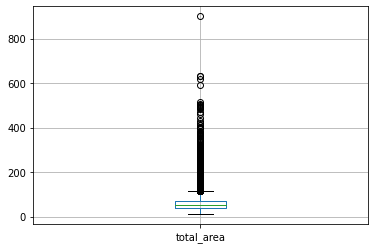

In [218]:
print(df['total_area'].describe())
df.boxplot(column='total_area')


<AxesSubplot:>

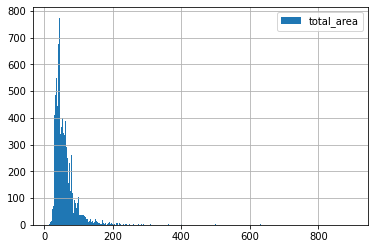

In [219]:
df['total_area'].hist(bins=900, legend=True, grid=True)

### Изучение цены

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


<AxesSubplot:>

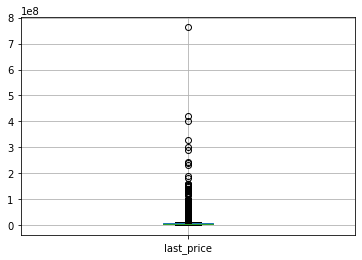

In [220]:
print(df['last_price'].describe())
df.boxplot(column='last_price', grid=True)

<AxesSubplot:>

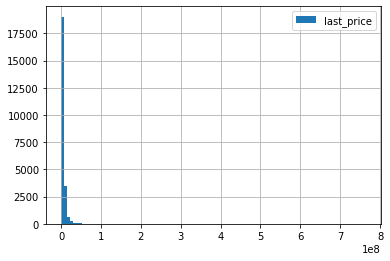

In [221]:
df['last_price'].hist(bins=100, legend=True, grid=True)

### Изучение числа комнат

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


<AxesSubplot:>

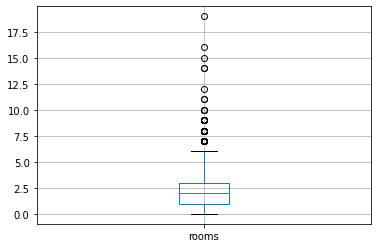

In [222]:
print(df['rooms'].describe())
df.boxplot(column='rooms')

<AxesSubplot:>

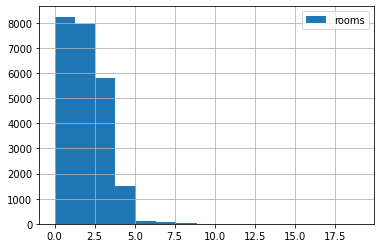

In [223]:
df['rooms'].hist(bins=15, legend=True, grid=True)

### Изучение высоты потолков

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

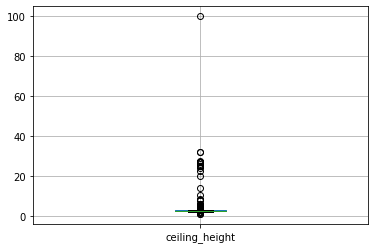

In [224]:
print(df['ceiling_height'].describe())
df.boxplot(column='ceiling_height')


<AxesSubplot:>

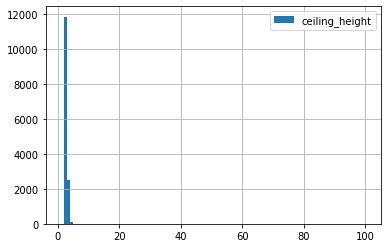

In [225]:
df['ceiling_height'].hist(bins=100, legend=True, grid=True)


### Изучение времени продажи

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


<AxesSubplot:>

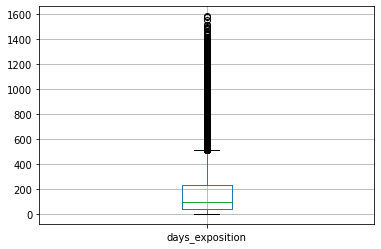

In [226]:
print(df['days_exposition'].describe())
df.boxplot(column='days_exposition')


<AxesSubplot:>

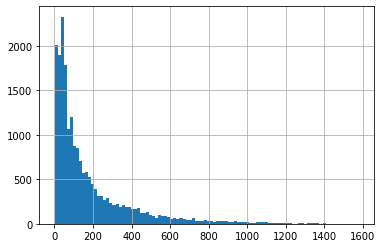

In [227]:
df['days_exposition'].hist(bins=100)

In [234]:
to_long_sales_percent = df.query('days_exposition > 500')['days_exposition'].count() / sales_count
print(f'Количество очень долгих продаж: {to_long_sales_percent:.1%}')

Количество очень долгих продаж: 7.4%


<div class="alert alert-info">
1. Среднее время продажи квартир - 95 дней (медиана). Но медиана сильно отличается от среднего - в 2 раза, значит имеются выбросы - слишком длительные продажи. Действительно, по данным диаграммы "ящик с усами", имеются сильно выбивающиеся по времени продажи квартиры - более 500 дней. Таких продаж всего около 7% - их лучше удалить из анализа.
    
2. Также подозрительны продажи за 1 день - слишком быстро: обычно покупатели или торгуются, или еще не собрали нужную сумму, или еще присматриваются к квартирам и другие причины. К тому же сначала нужно договориться с покупателем об условиях продажи, удостовериться в точном решении о покупке, а затем обычно только объявление снимают с продажи.

</div>

### Удаление редких и выбивающихся значений

In [ ]:
df = df.query('total_area <= 100')
df['total_area'].hist(bins=90, legend=True, grid=True)


In [ ]:
df = df.query('last_price < 1.000000e+07')
df['last_price'].describe()
df['last_price'].hist(bins=10, legend=True, grid=True)

In [ ]:
df = df.query('rooms != 0 and rooms < 6')
df['rooms'].hist(bins=5, legend=True, grid=True)

In [ ]:
df = df.query('ceiling_height >= 2.0 and ceiling_height < 5.0')
print(df['ceiling_height'].describe())
df['ceiling_height'].hist(bins=5)

In [ ]:
df = df.query('days_exposition != 1 and days_exposition < 500')
df['days_exposition'].hist(bins=499, legend=True)

In [ ]:
removed_shape = (sales_count - df.shape[0]) / sales_count
print(f'% удаленных выбросов: {removed_shape:.0%} от всех данных')

Обнаружены аномалии среди квартир:
1) низкими потолками (1 метр),
2) нулевым числом комнат,
3) временем продажи всего 1 день.

Также обнаружены редкие явления среди квартир:
1) с очень большой площадью (более 100 метров),
2) с числом комнат более 5,
3) стоимостью более 1.000000e+07,
4) высотой потолков больше 5 метров,
5) временем продажи более 500 дней.

Эти продажи удалены из выборки - 60% от первоначальных данных.

### Факторы, влияющие на стоимость квартиры

#### Площадь 

In [ ]:
print('Корреляция с площадью', df['last_price'].corr(df['total_area']).round(2))
df.plot(x='last_price', y='total_area', kind='hist', bins=100)

#### Число комнат

In [ ]:
print('Коррелция с числом комнат', df['last_price'].corr(df['rooms']).round(2))
df.plot(x='last_price', y='rooms', kind='hist', bins=5)

#### Удаленность от центра

In [ ]:
print('Корреляция с удаленностью от центра', df['last_price'].corr(df['city_centers_nearest']).round(2))
df.plot(x='last_price', y='city_centers_nearest', kind='hist', bins=100)

#### Категория этажа

In [ ]:
def floor_category_number(floor):
    if floor == 'первый':
        return 1
    elif floor == 'последний':
        return 3
    else:
        return 2
df['floor_category_raiting'] = df['floor_category'].apply(floor_category_number)
print('Корреляция с категорией этажа', df['last_price'].corr(df['floor_category_raiting']).round(2))
df.plot(x='last_price', y='floor_category_raiting', kind='hist', bins=3)
                                                                                    

#### Дата размещения

In [ ]:
print('Корреляция с датой размещения', df['last_price'].corr(df['days_exposition']).round(2))
df.plot(x='last_price', y='days_exposition', kind='hist', bins=100)

На стоимость квартиры больше всего влияют: площадь квартиры, число комнат и удаленность от центра.
Стоимость квартиры тем выше, чем больше площадь квартиры и число комнат и чем ближе расстояние квартиры до центра города.

### Выборка: населённый пункт с наибольшим числом объявлений с сегментом квартир в центре

#### Топ 10 населенных пунктов с наибольшим числом объявлений

In [ ]:
#10 населённых пунктов с наибольшим числом объявлений
df_by_locality_name = df.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean'])
df_by_locality_name.columns = ['Количество объявлений', 'Средняя цена за кв м']
df_by_locality_name['Средняя цена за кв м'] = df_by_locality_name['Средняя цена за кв м'].round(2)
df_by_locality_name = df_by_locality_name.sort_values(by='Количество объявлений', ascending=False)
display(df_by_locality_name.head(10))


#### Квартиры в Санкт-Петербурге

In [ ]:
spb_sales = df.query('locality_name == "Санкт-Петербург"')
spb_sales.loc[:, 'city_centers_nearest_km'] = (spb_sales.loc[:, 'city_centers_nearest'] / 1000).round()
spb_sales.loc[:, 'price_per_city_centers_km'] = (spb_sales.loc[:, 'last_price'] / spb_sales.loc[:, 'city_centers_nearest_km']).round()
display(spb_sales.head())
print(spb_sales['city_centers_nearest_km'].describe())
spb_sales.plot(x='price_per_city_centers_km', y='city_centers_nearest_km', kind='hist', grid=True, bins=29)


#### Квартиры в Санкт-Петербурге в центре

In [ ]:
spb_center_sales = spb_sales.query('city_centers_nearest_km <= 17')
display(spb_center_sales.head())

В Санкт-Петербурге центр находится в радиусе приблизительно до 17 км.

#### Анализ продаж квартир в центре Санкт-Петербурга

##### Анализ территории: площадь, цена, число комнат, высота потолков.

In [ ]:
spb_center_sales['total_area'].hist(bins=100, legend=True, grid=True)

In [ ]:
spb_center_sales['last_price'].hist(bins=100, legend=True, grid=True)

In [ ]:
spb_center_sales['rooms'].hist(bins=5, legend=True, grid=True)

In [ ]:
spb_center_sales['ceiling_height'].hist(bins=5, legend=True, grid=True)

##### Факторы, вляющие на стоимость квартиры в центре Санкт-Петербурга

In [ ]:
#Зависимость от площади
print('Коэффициент корреляции Пирсона', spb_center_sales['last_price'].corr(spb_center_sales['total_area']).round(2))
spb_center_sales.plot(x='last_price', y='total_area', kind='hist', bins=100)

In [ ]:
#Зависимость от числа комнат
print('Коэффициент корреляции Пирсона', spb_center_sales['last_price'].corr(spb_center_sales['rooms']).round(2))
spb_center_sales.plot(x='last_price', y='rooms', kind='hist', bins=5)

In [ ]:
#Зависимость от высоты потолков
print('Коэффициент корреляции Пирсона', spb_center_sales['last_price'].corr(spb_center_sales['ceiling_height']).round(2))
spb_center_sales.plot(x='last_price', y='ceiling_height', kind='hist', bins=5)

In [ ]:
#Зависимость от категории этажа
print('Коэффициент корреляции Пирсона', spb_center_sales['last_price'].corr(spb_center_sales['floor_category_raiting']).round(2))
spb_center_sales.plot(x='last_price', y='floor_category_raiting', kind='hist', bins=3)

In [ ]:
#Зависимость от категории от удаленности от центра в км
print('Коэффициент корреляции Пирсона', spb_center_sales['last_price'].corr(spb_center_sales['city_centers_nearest_km']).round(2))
spb_center_sales.plot(x='last_price', y='city_centers_nearest_km', kind='hist', bins=17)

In [ ]:
#Зависимость от даты размещения объявления
print('Коэффициент корреляции Пирсона', spb_center_sales['last_price'].corr(spb_center_sales['days_exposition']).round(2))
spb_center_sales.plot(x='last_price', y='days_exposition', kind='hist', bins=11)


## Общий вывод

На стоимость квартиры больше всего влияют: площадь квартиры, число комнат и удаленность от центра. Это видно как по всей базе продаж квартир, так и по квартирам в центре Санкт-Петербурге. Стоимость квартиры тем выше, чем больше ее площадь и число комнат и чем ближе она расположена к центру.

Также существует небольшая зависимость от этажа: цена квартиры на первом и последнем этажах примерно одинаковая и ниже, чем на других этажах.

Также обнаружены аномалии среди квартир:
1) у некоторых населенных пунктов нет названия,
2) нереально низкие потолки (1 метр),
3) нулевое число комнат,
4) слишком короткое время продажи - всего 1 день.

Необходимо разобраться, вызваны ли они техническими причинами или неправильными/ мошенническими действиями со стороны продавцов квартир.